In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pydataset import data

We're going to work with some pre-defined data sets originally used in R:

In [44]:
datasets = data()
print(datasets)

        dataset_id                                             title
0    AirPassengers       Monthly Airline Passenger Numbers 1949-1960
1          BJsales                 Sales Data with Leading Indicator
2              BOD                         Biochemical Oxygen Demand
3     Formaldehyde                     Determination of Formaldehyde
4     HairEyeColor         Hair and Eye Color of Statistics Students
..             ...                                               ...
752        VerbAgg                  Verbal Aggression item responses
753           cake                 Breakage Angle of Chocolate Cakes
754           cbpp                 Contagious bovine pleuropneumonia
755    grouseticks  Data on red grouse ticks from Elston et al. 2001
756     sleepstudy       Reaction times in a sleep deprivation study

[757 rows x 2 columns]


We'll use the 'iris' dataset, what is it?  Read the documentation to find out:

In [45]:
data('iris', show_doc=True)
df = data('iris')

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [46]:
print(df)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
1             5.1          3.5           1.4          0.2      setosa
2             4.9          3.0           1.4          0.2      setosa
3             4.7          3.2           1.3          0.2      setosa
4             4.6          3.1           1.5          0.2      setosa
5             5.0          3.6           1.4          0.2      setosa
6             5.4          3.9           1.7          0.4      setosa
7             4.6          3.4           1.4          0.3      setosa
8             5.0          3.4           1.5          0.2      setosa
9             4.4          2.9           1.4          0.2      setosa
10            4.9          3.1           1.5          0.1      setosa
11            5.4          3.7           1.5          0.2      setosa
12            4.8          3.4           1.6          0.2      setosa
13            4.8          3.0           1.4          0.1      setosa
14            4.3   

In [47]:
df.loc[df['Species'].isin(['setosa']), 'Species'] = 'red'
df.loc[df['Species'].isin(['versicolor']), 'Species'] = 'blue'
df.loc[df['Species'].isin(['virginica']), 'Species'] = 'green'
print(df)
colours = df['Species']

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1             5.1          3.5           1.4          0.2     red
2             4.9          3.0           1.4          0.2     red
3             4.7          3.2           1.3          0.2     red
4             4.6          3.1           1.5          0.2     red
5             5.0          3.6           1.4          0.2     red
6             5.4          3.9           1.7          0.4     red
7             4.6          3.4           1.4          0.3     red
8             5.0          3.4           1.5          0.2     red
9             4.4          2.9           1.4          0.2     red
10            4.9          3.1           1.5          0.1     red
11            5.4          3.7           1.5          0.2     red
12            4.8          3.4           1.6          0.2     red
13            4.8          3.0           1.4          0.1     red
14            4.3          3.0           1.1          0.1     red
15        

**Make a scatter plot of the petal lengths against petal widths and colour the points by the true class label (species)**

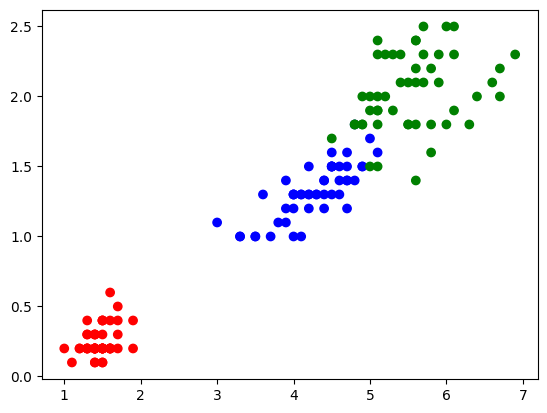

In [48]:
plt.scatter(df['Petal.Length'],df['Petal.Width'],c=colours)

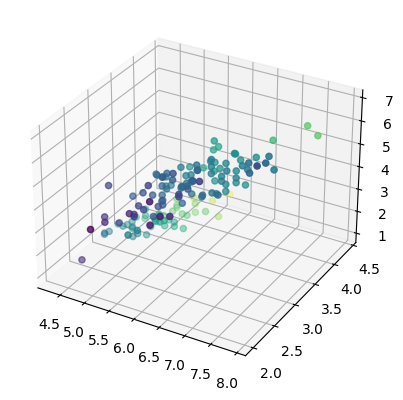

In [58]:
ax = plt.axes(projection='3d')

ax.scatter(df['Sepal.Length'], df['Sepal.Width'], df['Petal.Length'], c=df['Sepal.Width'], marker='o')

**Use the KMeans clustering algorithm to find clusters.  How many clusters should you choose?  Remember to normalise your inputs (axis=0)**

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
K_df = df
Length_width = df[['Petal.Length','Petal.Width','Sepal.Length','Sepal.Width']].to_numpy()
a = normalize(Length_width,axis=0)
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(a)

**Make two subplots of petal widths against petal lengths, one with the colous of the points as the true label and one with the colours of the predicted cluster.  How well is the clustering doing?**

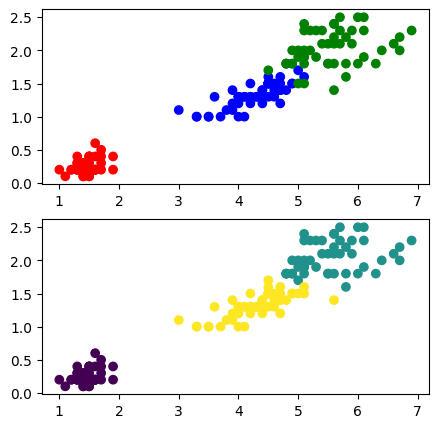

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(5,5))
axes[0].scatter(df['Petal.Length'],df['Petal.Width'],c=colours)
axes[1].scatter(df['Petal.Length'],df['Petal.Width'],c=kmeans.predict(a))

**Now make and train a neural network to predict the class, don't forget your train test split!**

In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

2023-03-22 09:55:44.890861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 09:55:44.968104: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/anaconda3/envs/tf2.11/lib::/usr/lib/nvidia:/usr/local/cuda/lib64
2023-03-22 09:55:44.968118: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
df = df[['Petal.Length','Petal.Width','Species']]
df = shuffle(df)
df.loc[df['Species'].isin(['red']), 'Species'] = '0'
df.loc[df['Species'].isin(['blue']), 'Species'] = '1'
df.loc[df['Species'].isin(['green']), 'Species'] = '2'
df['Species'] = df['Species'].astype(int)

df_species = df['Species']
df_LW = df[['Petal.Length','Petal.Width']]

train_spec,test_spec,train_LW,test_LW = train_test_split(df_species,df_LW,test_size=0.1)

train_LW = train_LW.to_numpy()
train_spec = train_spec.to_numpy()
test_spec = test_spec.to_numpy()

print(train_LW[:5])
print(train_spec[:5])

[[3.9 1.1]
 [1.6 0.2]
 [1.4 0.2]
 [4.6 1.3]
 [1.4 0.3]]
[1 0 0 1 0]


In [11]:
BatchSize       = 10
Nepochs         = 100
DropoutValue    = 0.15

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, input_dim=2, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(DropoutValue),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(DropoutValue),
  tf.keras.layers.Dense(3,activation='softmax')
])


print("--------------------------------------------------------------------------------------------------------------\n\n")
print("Dropout values       = ", DropoutValue)
print("BatchSize            = ", BatchSize)
print("Nepochs              = ", Nepochs)

# now specify the loss function 
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
learning_rate = 0.001 # alpha.

# now we can train the model to make predictions.
#   Use the ADAM optimiser
#   Specify the metrics to report as accuracy
#   Specify the loss function (see above)
# the fit step specifies the number of training epochs
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=loss_fn,metrics='accuracy')
history  = model.fit(train_LW,train_spec,validation_split = 0.3, batch_size=BatchSize, epochs=Nepochs)

--------------------------------------------------------------------------------------------------------------


Dropout values       =  0.15
BatchSize            =  10
Nepochs              =  100
Epoch 1/100


2023-03-22 09:55:46.366603: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-22 09:55:46.366849: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/anaconda3/envs/tf2.11/lib::/usr/lib/nvidia:/usr/local/cuda/lib64
2023-03-22 09:55:46.366941: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/anaconda3/envs/tf2.11/lib::/usr/lib/nvidia:/usr/local/cuda/lib64
2023-03-22 09:55:46.367021: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader

10/10 [==============================] - 1s 15ms/step - loss: 1.1012 - accuracy: 0.3298 - val_loss: 1.0709 - val_accuracy: 0.2683
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0704 - accuracy: 0.2660 - val_loss: 1.0219 - val_accuracy: 0.3171
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0146 - accuracy: 0.2872 - val_loss: 1.0031 - val_accuracy: 0.3171
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9962 - accuracy: 0.3085 - val_loss: 0.9723 - val_accuracy: 0.3171
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9879 - accuracy: 0.2660 - val_loss: 0.9475 - val_accuracy: 0.3415
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9279 - accuracy: 0.3404 - val_loss: 0.9270 - val_accuracy: 0.5122
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.9029 - accuracy: 0.5213 - val_loss: 0.8923 - val_accuracy: 0.9024
Epoch 8/100
10/10 [=====

Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2571 - accuracy: 0.8830 - val_loss: 0.1179 - val_accuracy: 0.9756
Epoch 60/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2869 - accuracy: 0.8830 - val_loss: 0.1022 - val_accuracy: 1.0000
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2736 - accuracy: 0.8830 - val_loss: 0.0957 - val_accuracy: 1.0000
Epoch 62/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2265 - accuracy: 0.9255 - val_loss: 0.0927 - val_accuracy: 1.0000
Epoch 63/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2114 - accuracy: 0.9362 - val_loss: 0.0919 - val_accuracy: 1.0000
Epoch 64/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2265 - accuracy: 0.9043 - val_loss: 0.0820 - val_accuracy: 1.0000
Epoch 65/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2584 - accuracy: 0.8830 - val_loss: 0.0808 - val_accuracy: 1.0000
Epoch 

**Make plots of the loss and accuracy for the training and test sets**

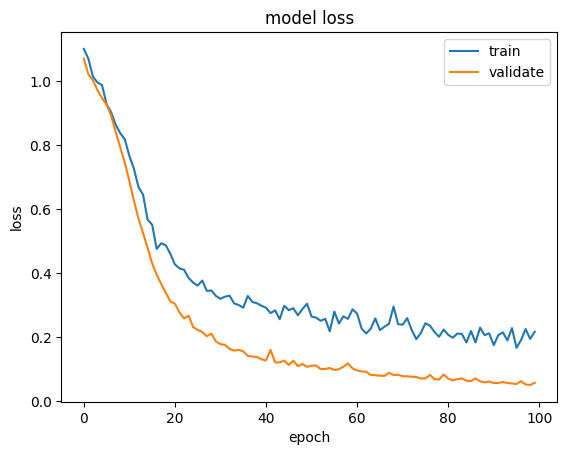

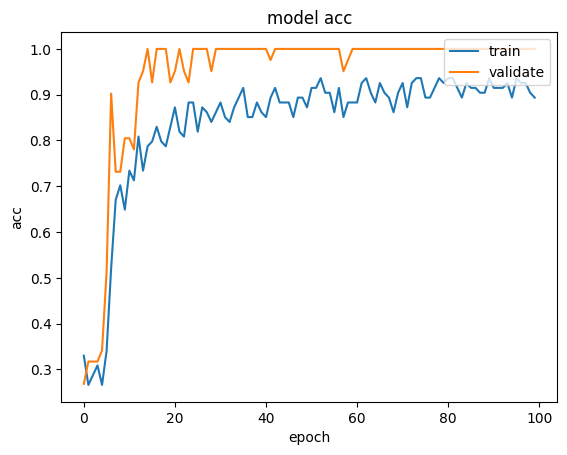

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

In [36]:
NN_Spec = model.predict(df_LW)
NN_maxSpec = []
alphas = []
for i in NN_Spec:
    alphas.append((i[np.argmax(i)])**5)
    NN_maxSpec.append(np.argmax(i))

5/5 [==============================] - 0s 733us/step


In [37]:
print(alphas)

[0.7709686961169485, 0.8924018079783633, 0.9970334270517035, 0.8661858636181299, 0.8431881335837258, 0.8568641176999479, 0.38830091354877305, 0.8786826486608736, 0.9984560020636166, 0.38830091354877305, 0.9224337206098822, 0.7183060515014571, 0.7768386741534675, 0.9184159634135279, 0.7929279559605078, 0.9027661245912223, 0.9983619466123096, 0.9380256187569541, 0.9535625232203768, 0.7929279559605078, 0.994096737869144, 0.6998480561428532, 0.7690742109397088, 0.9985155344932442, 0.9991038675367574, 0.7943954400679623, 0.9128848416296765, 0.6061662038767447, 0.9985155344932442, 0.6061662038767447, 0.5214445754587473, 0.9941697072876583, 0.8431881335837258, 0.6135291900051854, 0.9629976049307986, 0.8459835583934494, 0.6264608490359034, 0.9984560020636166, 0.5987060093905162, 0.7804862065620514, 0.3409800767815786, 0.2595916743077317, 0.7122500354415636, 0.08245601020212505, 0.8965139829228993, 0.24083007225279499, 0.994096737869144, 0.999218231639986, 0.4159560847706604, 0.3883009135487730

**Make three subplots of petal widths against petal lengths, one coloured by the true class label, one by the clustering prediction and one by the neural network prediction.  How does the accuracy compare?  What advantage can the neural network prediction give in the case that you do have labelled data?**

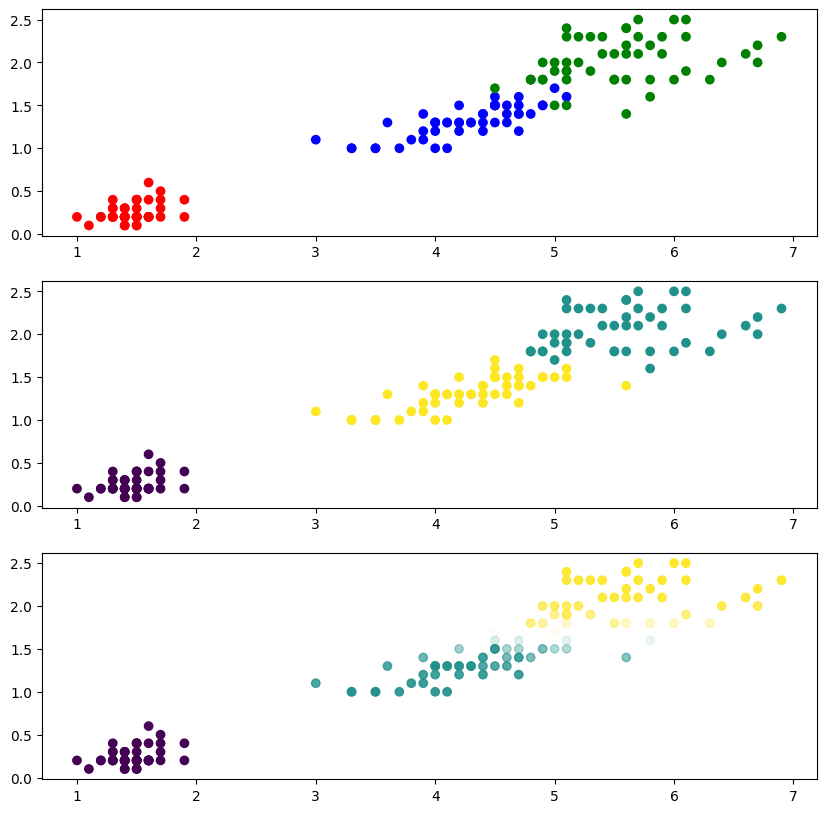

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(10,10))
axes[0].scatter(K_df['Petal.Length'],K_df['Petal.Width'],c=colours)
axes[1].scatter(K_df['Petal.Length'],K_df['Petal.Width'],c=kmeans.predict(a))
axes[2].scatter(df_LW['Petal.Length'],df_LW['Petal.Width'],c=NN_maxSpec,alpha=alphas)